Image Classification - **BATIK CLASSIFICATION**

In [ ]:
# from google.colab import drive
# drive.flush_and_unmount()

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
#Menggunakan gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/AOL Deep Learning/

/content/drive/MyDrive/AOL Deep Learning


In [ ]:
!ls

 batik-bali	     batik-ceplok      batik-kawung	   batik-parang       batik-sidoluhur
 batik-betawi	     batik-ciamis      batik-keraton	   batik-pekalongan   batik-sidomukti
'batik-celup GAK'    batik-garutan     batik-lasem	   batik-priangan     batik-sogan
 batik-cendrawasih   batik-gentongan   batik-megamendung   batik-sekar	      batik-tambal


### Import libraries yang digunakan

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import PIL
from PIL import Image
import cv2
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import classification_report

### Melihat 3 gambar pertama dan jumlah gambar pada setiap kategori batik


batik-lasem:
Total data: 50


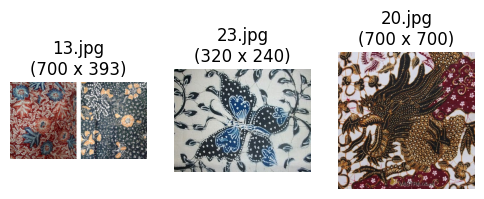


batik-megamendung:
Total data: 46


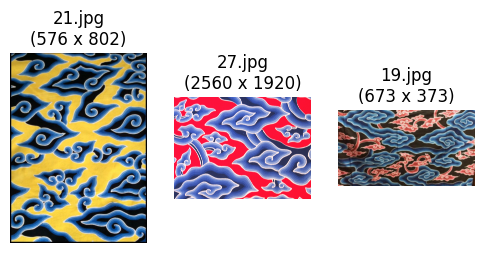


batik-kawung:
Total data: 45


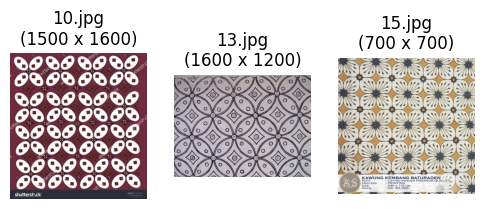

In [ ]:
data_path = Path("/content/drive/MyDrive/AOL Deep Learning/")
selected_categories = ["batik-lasem", "batik-megamendung", "batik-kawung"]

for category in selected_categories:
    category_path = data_path / category
    if category_path.exists():
        print(f"\n{category}:")
        images = list(category_path.glob('*'))[:3]  # Mengambil 3 gambar pertama
        total_images = len(list(category_path.glob('*')))  # Menghitung jumlah gambar dalam direktori
        print(f"Total data: {total_images}")
        fig, axes = plt.subplots(1, 3, figsize=(6, 3))
        for i, img_path in enumerate(images):
            img = Image.open(img_path)
            axes[i].imshow(img)
            axes[i].set_title(f"{img_path.name}\n({img.size[0]} x {img.size[1]})")
            axes[i].axis('off')
        plt.show()
    else:
        print(f"\nFolder {category} tidak ditemukan di {data_path}")

Kami memilih untuk membuat model untuk mengklasifikasikan ketiga jenis batik ini yaitu "batik-lasem", "batik-megamendung", "batik-kawung"

Kami memilih ketiga jenis batik ini karena setelah melihat secara manual semua class batik yang tersedia, kami melihat bahwa ketiga batik ini mempunyai pola yang jelas dan khas, sehingga lebih mudah untuk dibedakan antara satu kelas dengan kelas yang lain.

Kami menggunakan 45 gambar Batik Kawung dan 50 gambar Batik Lasem sesuai dengan gambar yang tersedia dalam Kaggle. Namun, untuk Batik Megamendung, terdapat 1 gambar yaitu gambar 49 yang tidak berhasil dibaca oleh program, sehingga kami hanya menggunakan 46 gambar dari total 47 gambar yang tersedia.

Semua gambar mempunyai ukuran yang berbeda-beda, sehingga nantinya akan perlu dilakukan penyeragaman lebih lanjut.

# **Split Dataset**

**Split dataset** menjadi 80% training set, 10% validation set dan 10% testing set (TANPA RESIZE)

In [ ]:
# List untuk menyimpan semua gambar dan label
images = []
labels = []

# Loop untuk setiap kategori batik yang dipilih
for idx, category in enumerate(selected_categories):
    category_path = data_path / category
    if category_path.exists():
        # print(f"\nMemproses kategori: {category}")
        # Ambil gambar untuk setiap kategori
        for image_path in category_path.glob('*'):
            img = cv2.imread(str(image_path))
            if img is not None:
                # Ubah dari BGR ke RGB
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                # Masukkan gambar dan label ke dalam list
                images.append(img_rgb)
                labels.append(idx)  # Indeks kategori sebagai label
            else:
                print(f"Warning: Gambar di {image_path} tidak dapat dibaca.")
    else:
        print(f"Warning: Folder {category} tidak ditemukan di {data_path}")

# Pisahkan dataset menjadi training set, validation set, dan test set (80% training, 10% validation, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Cetak ukuran setiap set
print("Jumlah data training:", len(X_train))
print("Jumlah data validation:", len(X_val))
print("Jumlah data test:", len(X_test))

Jumlah data training: 112
Jumlah data validation: 14
Jumlah data test: 15


Dapat dilihat bahwa batik-megamendung 49, tidak dapat dibaca oleh program

In [ ]:
X_train

[array([[[148,  90,  79],
         [141,  87,  75],
         [128,  80,  70],
         ...,
         [ 67,  24,  18],
         [ 60,  17,  11],
         [ 53,  10,   4]],
 
        [[166, 108,  97],
         [164, 110, 100],
         [145,  97,  87],
         ...,
         [ 85,  37,  33],
         [ 79,  31,  27],
         [ 75,  27,  23]],
 
        [[209, 152, 143],
         [213, 161, 150],
         [183, 136, 126],
         ...,
         [103,  45,  43],
         [100,  42,  40],
         [ 98,  40,  38]],
 
        ...,
 
        [[ 44,  31,  40],
         [ 64,  51,  60],
         [ 75,  62,  71],
         ...,
         [ 18,   7,   3],
         [ 24,  13,   9],
         [ 26,  15,  11]],
 
        [[  9,   0,   5],
         [ 17,   4,  13],
         [ 22,   9,  18],
         ...,
         [ 22,  11,   7],
         [ 32,  21,  17],
         [ 38,  27,  23]],
 
        [[ 34,  21,  30],
         [ 35,  22,  31],
         [ 31,  18,  27],
         ...,
         [ 30,  19,  15],
  

In [ ]:
y_val

[2, 0, 1, 1, 2, 0, 0, 1, 1, 2, 0, 2, 2, 1]

Karena terdapat 3 kelas, maka juga terdapat 3 label y, yaitu 0, 1, 2

**Menampilkan data pada training dan validation**

Training Set:


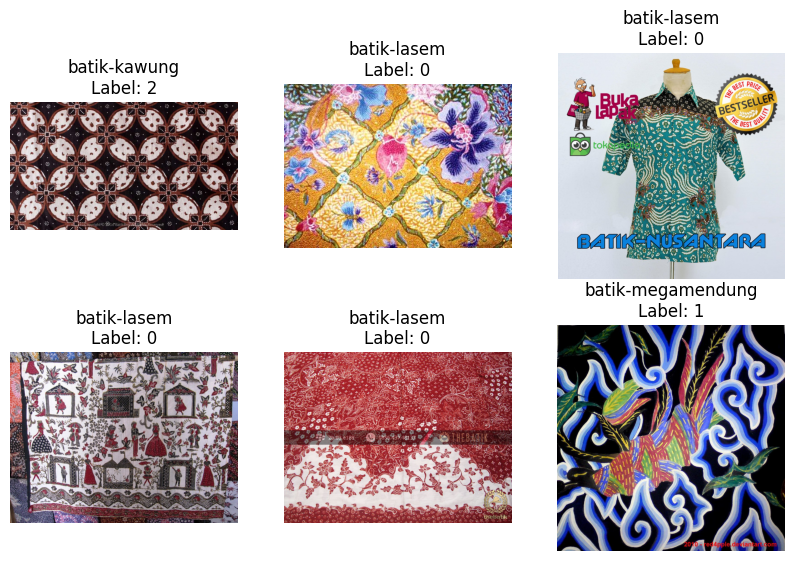

Validation Set:


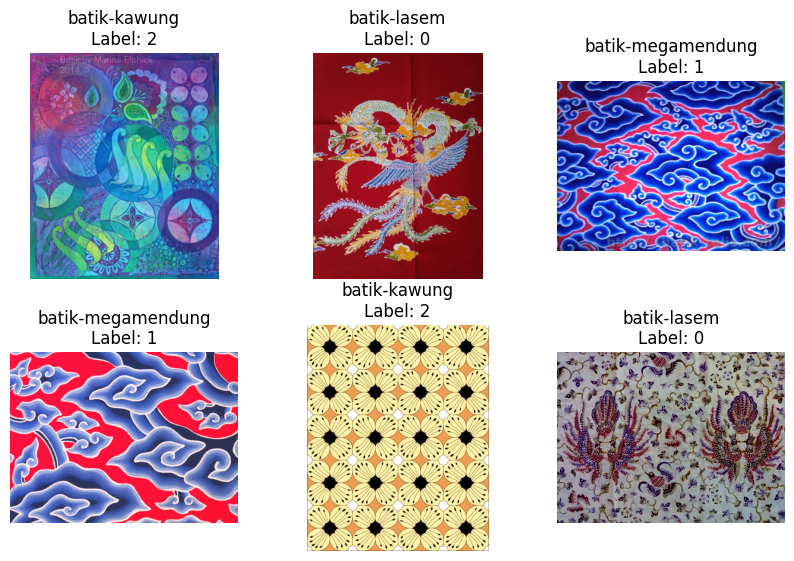

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar beserta labelnya
def show_images_labels(images, labels, class_names):
    np.random.seed(1)  # Set seed untuk mengacak gambar dengan urutan yang sama
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f'{class_names[labels[i]]}\nLabel: {labels[i]}')
        plt.axis("off")
    plt.show()

# List untuk menyimpan nama kelas
class_names = selected_categories

# Tampilkan gambar beserta labelnya untuk training set
print("Training Set:")
show_images_labels(X_train[:6], y_train[:6], class_names)

# Tampilkan gambar beserta labelnya untuk validation set
print("Validation Set:")
show_images_labels(X_val[:6], y_val[:6], class_names)


**LABEL:**

batik-lasem =0

batik-megamendung=1

batik-kawung=2

# **Exploratory Data Analysis**

## Color Histogram


batik-lasem:


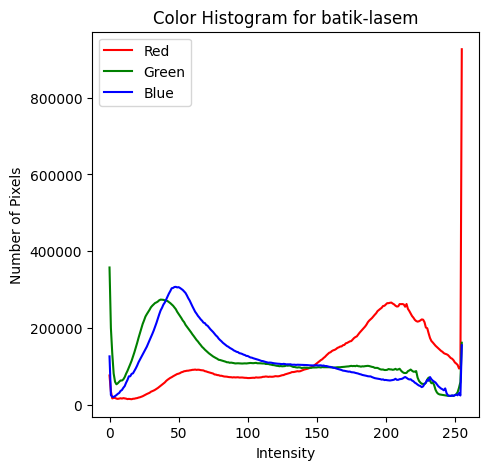


batik-megamendung:


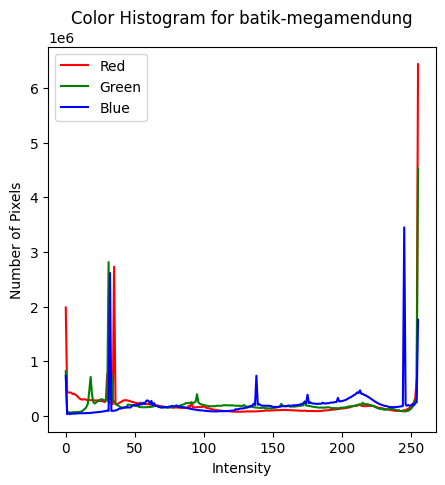


batik-kawung:


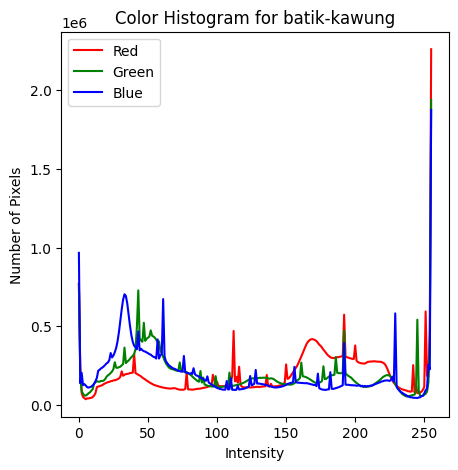

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk memplot histogram warna untuk satu kelas
def plot_color_histogram_for_class(images, class_name):
    # Inisialisasi histogram untuk masing-masing warna
    red_hist = np.zeros(256)
    green_hist = np.zeros(256)
    blue_hist = np.zeros(256)

    # Hitung histogram untuk setiap gambar dalam kelas
    for img in images:
        red_hist += np.histogram(img[:, :, 0], bins=256, range=(0, 256))[0]
        green_hist += np.histogram(img[:, :, 1], bins=256, range=(0, 256))[0]
        blue_hist += np.histogram(img[:, :, 2], bins=256, range=(0, 256))[0]

    # Plot histogram untuk masing-masing warna
    plt.figure(figsize=(8, 6))
    plt.plot(red_hist, color='r', label='Red')
    plt.plot(green_hist, color='g', label='Green')
    plt.plot(blue_hist, color='b', label='Blue')
    plt.title(f'Color Histogram for {class_name}')
    plt.xlabel('Intensity')
    plt.ylabel('Number of Pixels')
    plt.legend()
    plt.show()

# Ambil contoh dari X_train untuk setiap kategori
for idx, category in enumerate(selected_categories):
    class_images = [img for img, label in zip(X_train, y_train) if label == idx]

    if class_images:
        # Plot histogram warna untuk kelas ini
        plot_color_histogram_for_class(class_images, category)
    else:
        print(f"Warning: Tidak ada gambar yang berhasil dibaca untuk kategori {category}.")

Histogram warna ini akan menampilkan distribusi warna dari gambar training untuk tiap-tiap jenis batik. Dapat dilihat bahwa ketiga jenis batik memiliki color histogram yang berbeda satu sama lain.

## Resolution

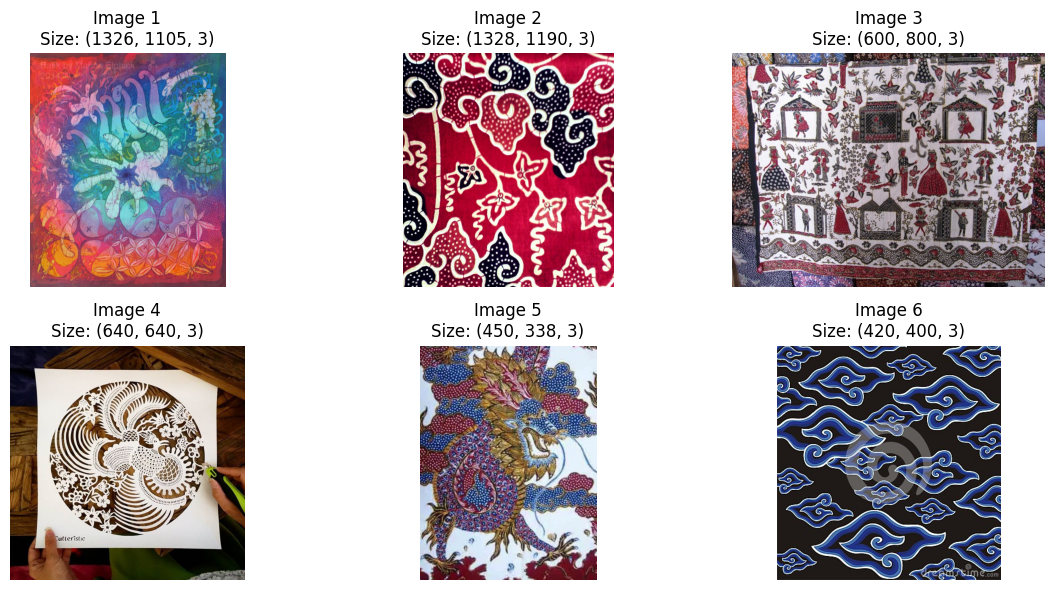

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(X_train[i])
    plt.title(f"Image {i+1}\nSize: {X_train[i].shape}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Dapat dilihat bahwa setiap gambar memiliki **resolusi yang berbeda**.

## Kondisi Pencahayaan

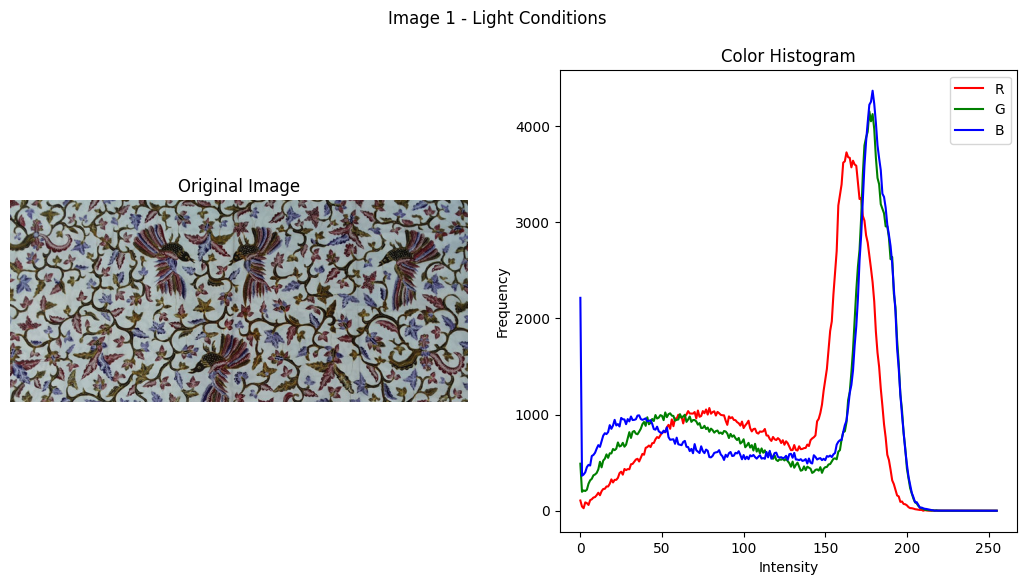

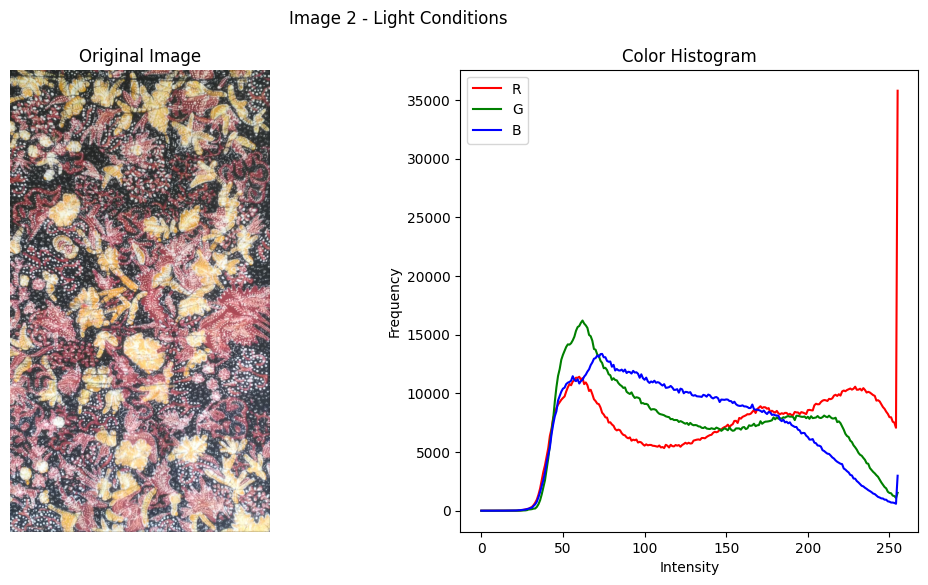

In [ ]:
# Fungsi untuk menampilkan gambar dan histogram distribusi warna
def plot_image_and_histogram(X_train, title):
    plt.figure(figsize=(13, 6))

    # Tampilkan gambar
    plt.subplot(1, 2, 1)
    plt.imshow(X_train)
    plt.title('Original Image')
    plt.axis('off')

    # Tampilkan histogram distribusi warna
    plt.subplot(1, 2, 2)
    for i, color in enumerate(['r', 'g', 'b']):
        histogram, _ = np.histogram(X_train[:,:,i], bins=256, range=(0, 256))
        plt.plot(histogram, color=color, label=color.upper())
    plt.title('Color Histogram')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.legend()

    plt.suptitle(title)
    plt.show()

# Fungsi untuk membandingkan light conditions dari dua gambar
def compare_light_conditions(X_train, idx1, idx2):
    image1 = images[idx1]
    image2 = images[idx2]

    plot_image_and_histogram(image1, f'Image {idx1+1} - Light Conditions')
    plot_image_and_histogram(image2, f'Image {idx2+1} - Light Conditions')

# Membandingkan light conditions dari dua gambar dalam X_train
compare_light_conditions(X_train, 0, 1)

Gambar pertama terlihat lebih gelap dan cenderung memiliki tone warna yang gelap. Ketika kita cek di histogram warnanya, ini terbukti dengan agak tingginya nilai piksel warna biru pada intensitas piksel 0 yang menandakan gambarnya gelap kebiruan.

Gambar kedua terlihat lebih terang karena pencahayaan. Warnanya cukup tercampur pada gambar aslinya dan masih ada beberapa warna gelap juga.

## Perspektif, Angle, Scale Variation, Background Variability dan Oklusi

Membandingkan Perspective and Angle:
--------------------------------------------
Kelas: batik-lasem, Jumlah gambar: 41


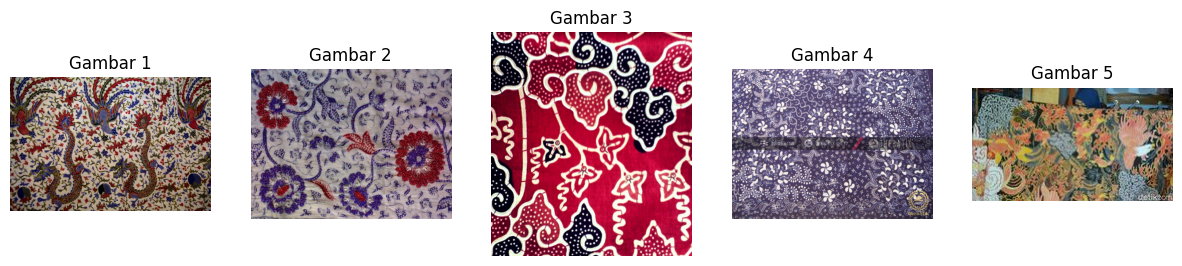

Kelas: batik-megamendung, Jumlah gambar: 37


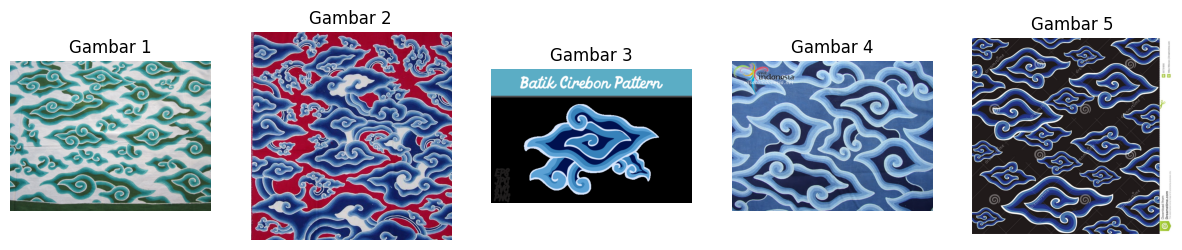

Kelas: batik-kawung, Jumlah gambar: 34


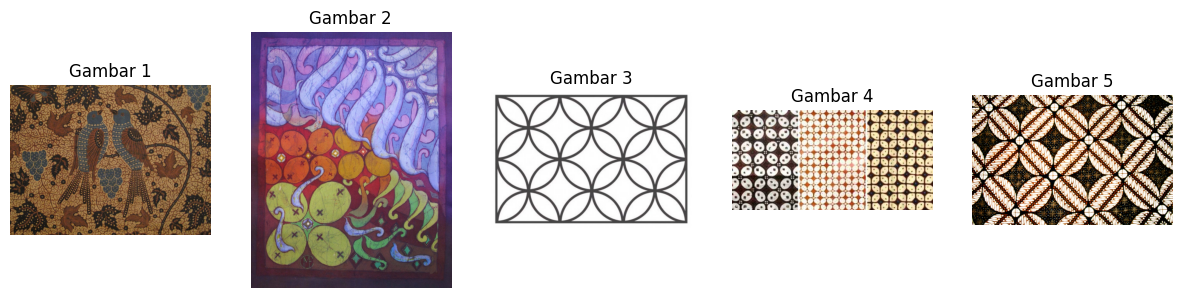

In [ ]:
np.random.seed(52)

def compare(X_train, y_train, class_names, num_samples=5):
    print("Membandingkan Perspektif, Angle, Scale Variation, Background Variability dan Oklusi:")
    print("--------------------------------------------")
    for i, label in enumerate(class_names):
        class_images = [img for img, lbl in zip(X_train, y_train) if lbl == i]
        print(f"Kelas: {label}, Jumlah gambar: {len(class_images)}")

        if len(class_images) == 0:
            print(f"Tidak ada gambar untuk kelas {label}")
            continue

        # Ambil beberapa contoh gambar
        sample_indices = np.random.choice(len(class_images), num_samples, replace=False)
        sample_images = [class_images[idx] for idx in sample_indices]

        # Tampilkan gambar-gambar beserta judul
        plt.figure(figsize=(15, 5))
        for j in range(num_samples):
            plt.subplot(1, num_samples, j + 1)
            plt.imshow(sample_images[j])
            plt.title(f"Gambar {j + 1}")
            plt.axis('off')
        plt.show()


# Membandingkan
compare(X_train, y_train, class_names)

Dari contoh gambar-gambar dalam folder train tersebut, dapat dilihat bahwa terdapat variasi perspektif, sudut pandang, latar belakang, skala, dan juga oklusi.

Untuk penjelasan lebih lengkapnya untuk masing-masing variasi, dapat dilihat dalam report kami.

# **MODELING**

Resize menjadi **288 x 288** sesuai dengan ketentuan EfficientNetB2

In [ ]:
# List to store all images and labels
images = []
labels = []

# Loop through selected categories
for idx, category in enumerate(selected_categories):
    category_path = data_path / category
    if category_path.exists():
        for image_path in category_path.glob('*'):
            img = cv2.imread(str(image_path))
            if img is not None:
                # Resize image to desired dimensions
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img_resized = cv2.resize(img, (288, 288))
                # Append resized image and label to lists
                images.append(img_resized)
                labels.append(idx)  # Index of category as label
            else:
                print(f"Warning: Unable to read image at {image_path}")
    else:
        print(f"Warning: Folder {category} not found in {data_path}")

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the sizes of each set
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Training set size: 112
Validation set size: 14
Test set size: 15


Karena **menggunakan random_state yang sama** dengan sebelumnya dan menggunakan 1 akun yang sama dalam pengerun-an code, seharusnya tidak ada perbedaan antara data training pada EDA dengan data training pada model.

In [ ]:
from keras.utils import to_categorical

# Convert labels to one-hot encoded format
y_train_categorical = to_categorical(y_train, num_classes=3)
y_val_categorical = to_categorical(y_val, num_classes=3)
y_test_categorical = to_categorical(y_test, num_classes=3)

## **MODEL DENGAN DATA ASLI** (NO AUGMENTATION)

### **MODEL FROM SCRATCH**

2 CONVO BLOCK + 1 FC LAYER

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

#Set seed
tf.random.set_seed(42) #supaya always get the same random value init for weight

model_scratch = keras.Sequential()

# First Convolutional Block
model_scratch.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(288, 288, 3)))
model_scratch.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"))
model_scratch.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Second Convolutional Block
model_scratch.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
model_scratch.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
model_scratch.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Flatten and Fully Connected Layers
model_scratch.add(Flatten())
model_scratch.add(Dense(128, activation='relu'))
model_scratch.add(Dense(3, activation='softmax'))  # Number of classes

model_scratch.build()
model_scratch.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 288, 288, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 288, 288, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 144, 144, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 144, 144, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 144, 144, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 72, 72, 64)        0         
 g2D)                                                   

In [ ]:
# Compile model
model_scratch.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

In [ ]:
from keras.utils import to_categorical

# Convert labels to one-hot encoded format
y_train_categorical = to_categorical(y_train, num_classes=3)
y_val_categorical = to_categorical(y_val, num_classes=3)
y_test_categorical = to_categorical(y_test, num_classes=3)

# Training model
history_scratch = model_scratch.fit(X_train, y_train_categorical,
                             epochs=10,
                             batch_size=32,
                             validation_data=(X_val, y_val_categorical))


# Evaluate model on validation set
val_loss, val_accuracy = model_scratch.evaluate(X_val, y_val_categorical)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

Epoch 1/10
4/4 [==============================] - 17s 2s/step - loss: 6257.8433 - accuracy: 0.3482 - val_loss: 359.7061 - val_accuracy: 0.2857
Epoch 2/10
4/4 [==============================] - 1s 148ms/step - loss: 140.8043 - accuracy: 0.4107 - val_loss: 93.7413 - val_accuracy: 0.2857
Epoch 3/10
4/4 [==============================] - 1s 152ms/step - loss: 62.7480 - accuracy: 0.3661 - val_loss: 17.1889 - val_accuracy: 0.2857
Epoch 4/10
4/4 [==============================] - 1s 155ms/step - loss: 5.7523 - accuracy: 0.5714 - val_loss: 0.8271 - val_accuracy: 0.6429
Epoch 5/10
4/4 [==============================] - 1s 167ms/step - loss: 1.1671 - accuracy: 0.5893 - val_loss: 0.6422 - val_accuracy: 0.7143
Epoch 6/10
4/4 [==============================] - 1s 157ms/step - loss: 0.6451 - accuracy: 0.7143 - val_loss: 0.7758 - val_accuracy: 0.6429
Epoch 7/10
4/4 [==============================] - 1s 152ms/step - loss: 0.7263 - accuracy: 0.6429 - val_loss: 0.7117 - val_accuracy: 0.7143
Epoch 8/10
4

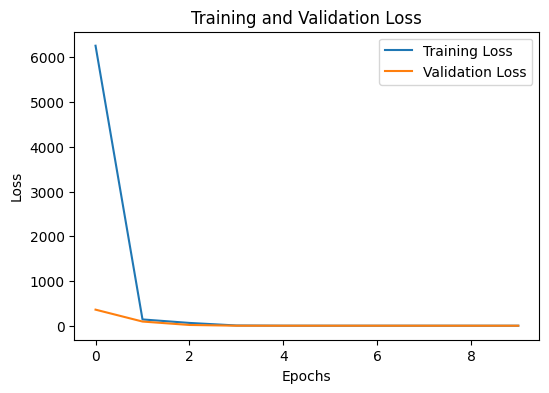

In [ ]:
# plot loss and validation loss
plt.figure(figsize=(6, 4))
plt.plot(history_scratch.history['loss'], label='Training Loss')
plt.plot(history_scratch.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Mapping antara label angka dan nama kelas
class_names_mapping = {
    0: 'batik-lasem',
    1: 'batik-megamendung',
    2: 'batik-kawung'
}


# Prediksi menggunakan model
y_pred1 = model_scratch.predict(X_test)

# Konversi probabilitas menjadi kelas
y_pred_classes1 = np.argmax(y_pred1, axis=1)

# Mapping label angka ke nama kelas
y_test_names = [class_names_mapping[label] for label in y_test]
y_pred_names = [class_names_mapping[label] for label in y_pred_classes1]

# Tampilkan classification report
print("\n Classification Report (Model from Scratch)")
print(classification_report(y_test_names, y_pred_names))

1/1 [==============================] - 1s 1s/step

 Classification Report (Model from Scratch)
                   precision    recall  f1-score   support

     batik-kawung       0.50      0.17      0.25         6
      batik-lasem       0.57      0.80      0.67         5
batik-megamendung       0.50      0.75      0.60         4

         accuracy                           0.53        15
        macro avg       0.52      0.57      0.51        15
     weighted avg       0.52      0.53      0.48        15



### **Kesimpulan Model dari scratch tanpa data augmentasi:**

**Hasil Training dan Validation**

    Epoch 1:
        Training Loss: 6257.8433, Training Accuracy: 0.3482
        Validation Loss: 359.7061, Validation Accuracy: 0.2857
    Epoch 10:
        Training Loss: 0.4031, Training Accuracy: 0.8750
        Validation Loss: 0.4533, Validation Accuracy: 0.8571

    Pada awal training, model memiliki loss yang sangat tinggi dan akurasi yang rendah.
    Seiring dengan bertambahnya epoch, training dan validation loss menurun signifikan, menunjukkan bahwa model belajar dari data.
    Akurasi meningkat secara bertahap, mencapai 87.50% untuk training dan 85.71% untuk validation pada epoch terakhir.
  
  **Hasil Testing**

    Testing Accuracy: 0.53 (53%):
      Akurasi testing lebih rendah dibandingkan dengan akurasi training dan validation.

    Precision, Recall, dan F1-Score:
      Variasi yang cukup besar antara kategori menunjukkan bahwa model memiliki performa yang tidak konsisten. Misalnya, precision untuk batik-lasem adalah 0.57, sementara recall-nya 0.80, menunjukkan bahwa model lebih baik dalam mengidentifikasi batik-lasem dibandingkan batik-kawung yang memiliki precision 0.50 dan recall hanya 0.17.
    
Dapat disimpulkan bahwa Model mengalami overfitting, karena performa di validation set jauh lebih baik daripada di test set.


### **MODEL FROM SCRATCH (TUNED)**

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

#Set seed
tf.random.set_seed(42) #supaya always get the same random value init for weight

model_scratch_tuning = keras.Sequential()

# First Convolutional Block
model_scratch_tuning.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(288, 288, 3)))
model_scratch_tuning.add(BatchNormalization())
model_scratch_tuning.add(MaxPooling2D((2, 2), strides=(2, 2)))
model_scratch_tuning.add(Dropout(0.3))

# Second Convolutional Block
model_scratch_tuning.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
model_scratch_tuning.add(BatchNormalization())
model_scratch_tuning.add(MaxPooling2D((2, 2), strides=(2, 2)))
model_scratch_tuning.add(Dropout(0.3))

# Flatten and Fully Connected Layers
model_scratch_tuning.add(Flatten())
model_scratch_tuning.add(Dense(128, activation='relu'))
model_scratch_tuning.add(Dropout(0.3))
model_scratch_tuning.add(Dense(3, activation='softmax'))  # Number of classes

model_scratch_tuning.build()
model_scratch_tuning.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 288, 288, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 288, 288, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 144, 144, 32)      0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 144, 144, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 144, 144, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 144, 144, 64)     

In [ ]:
model_scratch_tuning.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

In [ ]:
# Training model
history_scratch_tuning = model_scratch_tuning.fit(X_train, y_train_categorical,
                             epochs=10,
                             batch_size=32,
                             validation_data=(X_val, y_val_categorical))


# Evaluate model on validation set
val_loss_tuning, val_accuracy_tuning = model_scratch_tuning.evaluate(X_val, y_val_categorical)
print("Validation Loss:", val_loss_tuning)
print("Validation Accuracy:", val_accuracy_tuning)

Epoch 1/10
4/4 [==============================] - 4s 238ms/step - loss: 133.9804 - accuracy: 0.3839 - val_loss: 470.6149 - val_accuracy: 0.4286
Epoch 2/10
4/4 [==============================] - 1s 163ms/step - loss: 64.0332 - accuracy: 0.6875 - val_loss: 126.2385 - val_accuracy: 0.5714
Epoch 3/10
4/4 [==============================] - 1s 164ms/step - loss: 43.0053 - accuracy: 0.6964 - val_loss: 119.9919 - val_accuracy: 0.5714
Epoch 4/10
4/4 [==============================] - 1s 165ms/step - loss: 16.5077 - accuracy: 0.8304 - val_loss: 293.4781 - val_accuracy: 0.4286
Epoch 5/10
4/4 [==============================] - 1s 165ms/step - loss: 12.4758 - accuracy: 0.8571 - val_loss: 129.5750 - val_accuracy: 0.5000
Epoch 6/10
4/4 [==============================] - 1s 162ms/step - loss: 6.9491 - accuracy: 0.9196 - val_loss: 41.5711 - val_accuracy: 0.5714
Epoch 7/10
4/4 [==============================] - 1s 173ms/step - loss: 10.2596 - accuracy: 0.9196 - val_loss: 85.3866 - val_accuracy: 0.3571
E

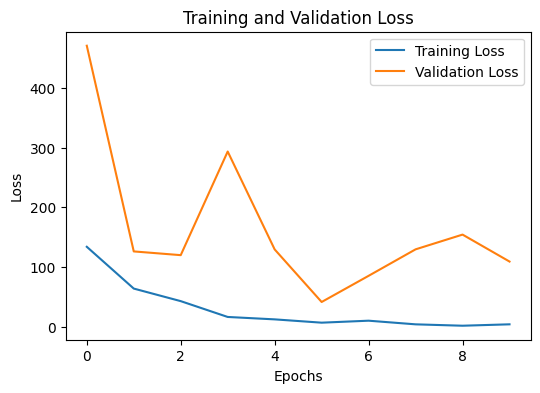

In [ ]:
# plot loss and validation loss
plt.figure(figsize=(6, 4))
plt.plot(history_scratch_tuning.history['loss'], label='Training Loss')
plt.plot(history_scratch_tuning.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Mapping antara label angka dan nama kelas
class_names_mapping = {
    0: 'batik-lasem',
    1: 'batik-megamendung',
    2: 'batik-kawung'
}


# Prediksi menggunakan model
y_pred_tuning = model_scratch_tuning.predict(X_test)

# Konversi probabilitas menjadi kelas
y_pred_classes_tuning = np.argmax(y_pred_tuning, axis=1)

# Mapping label angka ke nama kelas
y_test_names_tuning  = [class_names_mapping[label] for label in y_test]
y_pred_names_tuning = [class_names_mapping[label] for label in y_pred_classes_tuning]

# Tampilkan classification report
print("\nClassification Report (Model from Scratch Tuned)")
print(classification_report(y_test_names_tuning, y_pred_names_tuning))

1/1 [==============================] - 0s 86ms/step

Classification Report (Model from Scratch Tuned)
                   precision    recall  f1-score   support

     batik-kawung       1.00      0.50      0.67         6
      batik-lasem       0.00      0.00      0.00         5
batik-megamendung       0.33      1.00      0.50         4

         accuracy                           0.47        15
        macro avg       0.44      0.50      0.39        15
     weighted avg       0.49      0.47      0.40        15



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Kesimpulan model dari scratch tuning tanpa data augmentasi**

**Hasil Training dan Validation**

    Epoch 1:
        Training Loss: 133.9804, Training Accuracy: 0.3839
        Validation Loss: 470.6149, Validation Accuracy: 0.4286
    Epoch 10:
        Training Loss: 4.1871, Training Accuracy: 0.9286
        Validation Loss: 109.2690, Validation Accuracy: 0.4286

    Kesimpulan Training:
        Akurasi meningkat dari 38.39% menjadi 92.86%, menunjukkan bahwa model berhasil belajar dari data training.
        Loss menurun signifikan, mengindikasikan bahwa model menjadi lebih baik dalam memprediksi data training.

    Kesimpulan Validation:
        Akurasi validation cukup fluktuatif, mulai dari 42.86% pada epoch pertama dan berakhir pada angka yang sama di epoch terakhir, meskipun sempat mencapai 57.14%.
        Validation loss tetap tinggi dan fluktuatif, menunjukkan bahwa model mengalami kesulitan untuk melakukan generalisasi ke data yang tidak terlihat selama training.

  **Hasil Testing**

    Testing Accuracy: 0.47 (47%):
      Akurasi testing rendah dan menunjukkan bahwa model mengalami overfitting, yaitu performa model pada data training sangat baik tetapi tidak berhasil di data testing.

    Precision, Recall, dan F1-Score:
      batik-kawung: Precision 1.00 menunjukkan bahwa dari semua prediksi untuk batik-kawung, semuanya benar. Recall 0.50 menunjukkan bahwa dari semua data yang sebenarnya adalah batik-kawung, hanya setengah yang terprediksi dengan benar.
      batik-lasem: Precision dan Recall 0.00 menunjukkan bahwa model tidak dapat memprediksi kategori ini dengan benar sama sekali.
      batik-megamendung: Precision 0.33 menunjukkan bahwa dari semua prediksi untuk batik-megamendung, hanya 33% yang benar. Recall 1.00 menunjukkan bahwa semua data yang sebenarnya adalah batik-megamendung terprediksi dengan benar.

Kesimpulan:

    Overfitting: Model sangat cocok dengan data training namun gagal melakukan generalisasi pada data testing.
    Kinerja Kategori: Model memiliki performa yang sangat bervariasi antar kategori, dengan beberapa kategori memiliki precision atau recall yang sangat rendah.
    Tuning yang Tidak Optimal: Meskipun ada peningkatan akurasi training yang signifikan, tuning yang dilakukan tidak cukup untuk meningkatkan performa pada validation dan testing, mengindikasikan bahwa mungkin diperlukan lebih banyak tuning atau pendekatan berbeda seperti penggunaan arsitektur model yang lebih kompleks.

### **MODEL TRANSFER LEARNING KURANG DARI 10M PARAMETERS** (RESIZE 288)

### **EfficientNet-B2**

EfficientNetB2 adalah arsitektur Convolutional Neural Network dari keluarga EfficientNet yang sudah dilatih pada dataset besar seperti ImageNet dan memiliki bobot yang sudah dioptimalkan untuk ekstraksi fitur gambar. Kami memilih model ini untuk transfer learning karena performanya yang sesuai dengan state of the art dan jumlah parameter kurang dari 10 juta. Penggunaan EfficientNetB2 memiliki banyak keuntungan, seperti memanfaatkan fitur yang sudah dipelajari dari dataset besar untuk mempercepat pelatihan dan meningkatkan akurasi pada tugas klasifikasi yang lebih spesifik. Selain itu, dengan bobot yang sudah dilatih sebelumnya, model cenderung lebih baik dalam menggeneralisasi data baru dan mengurangi overfitting, menjadikannya pilihan yang baik untuk dibandingkan dengan model yang dibangun dari awal.

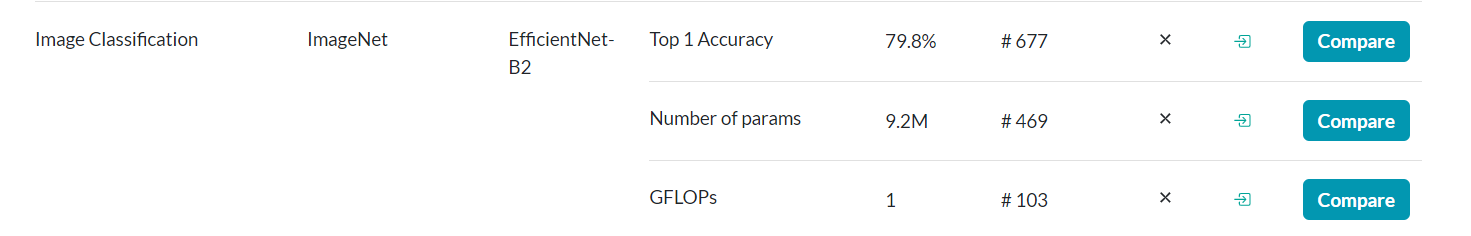

In [ ]:
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Load pre-trained EfficientNetB2 model
base_model = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(288, 288, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

# Create modified model
model_TL = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model_TL.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Print model summary
model_TL.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 288, 288, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 288, 288, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 288, 288, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 288, 288, 3)          0         ['normalization[0][0]']   

In [ ]:
# Training model
history_TL = model_TL.fit(X_train, y_train_categorical,
                             epochs=10,
                             batch_size=32,
                             validation_data=(X_val, y_val_categorical))

# Evaluate model on validation set
val_loss_TL, val_accuracy_TL = model_TL.evaluate(X_val, y_val_categorical)
print("Validation Loss:", val_loss_TL)
print("Validation Accuracy:", val_accuracy_TL)

Epoch 1/10
4/4 [==============================] - 20s 2s/step - loss: 0.8851 - accuracy: 0.5982 - val_loss: 0.2676 - val_accuracy: 0.9286
Epoch 2/10
4/4 [==============================] - 1s 151ms/step - loss: 0.2204 - accuracy: 0.9554 - val_loss: 0.1157 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 1s 146ms/step - loss: 0.1222 - accuracy: 0.9643 - val_loss: 0.0798 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 1s 146ms/step - loss: 0.0632 - accuracy: 0.9911 - val_loss: 0.0616 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 1s 144ms/step - loss: 0.0421 - accuracy: 1.0000 - val_loss: 0.0504 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 1s 146ms/step - loss: 0.0275 - accuracy: 1.0000 - val_loss: 0.0381 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 1s 144ms/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 0.0303 - val_accuracy: 1.0000
Epoch 8/10
4/4 [======

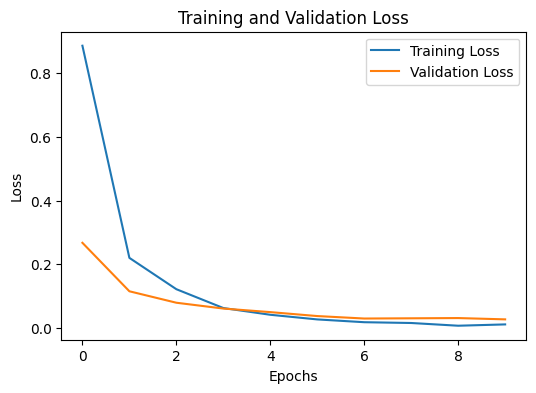

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history_TL.history['loss'], label='Training Loss')
plt.plot(history_TL.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Mapping antara label angka dan nama kelas
class_names_mapping = {
    0: 'batik-lasem',
    1: 'batik-megamendung',
    2: 'batik-kawung'
}

# Prediksi menggunakan model
y_pred_TL = model_TL.predict(X_test)

# Konversi probabilitas menjadi kelas
y_pred_classes_TL = np.argmax(y_pred_TL, axis=1)

# Mapping label angka ke nama kelas
y_test_names_TL = [class_names_mapping[label] for label in y_test]
y_pred_names_TL = [class_names_mapping[label] for label in y_pred_classes_TL]

# Tampilkan classification report
print("\nClassification Report (Model EfficientNetB2)")
print(classification_report(y_test_names_TL, y_pred_names_TL))

1/1 [==============================] - 4s 4s/step

Classification Report (Model EfficientNetB2)
                   precision    recall  f1-score   support

     batik-kawung       1.00      1.00      1.00         6
      batik-lasem       1.00      1.00      1.00         5
batik-megamendung       1.00      1.00      1.00         4

         accuracy                           1.00        15
        macro avg       1.00      1.00      1.00        15
     weighted avg       1.00      1.00      1.00        15



### **Kesimpulan model transfer learning EfficientNet-B2 tanpa data augmentasi**

**Hasil Training dan Validation**

    Epoch 1:
        Training Loss: 0.8851, Training Accuracy: 0.5982
        Validation Loss: 0.2676, Validation Accuracy: 0.9286
    Epoch 10:
        Training Loss: 0.0119, Training Accuracy: 1.0000
        Validation Loss: 0.0277, Validation Accuracy: 1.0000

    Kesimpulan Training:
        Akurasi meningkat dari 59.82% menjadi 100%, menunjukkan bahwa model berhasil belajar dari data training dengan sangat baik.
        Loss menurun signifikan, mengindikasikan bahwa model menjadi sangat baik dalam memprediksi data training.

    Kesimpulan Validation:
        Akurasi validation mulai dari 92.86% pada epoch pertama dan mencapai 100% pada epoch ke-10, menunjukkan bahwa model juga bekerja sangat baik pada data validation.
        Validation loss juga menurun secara konsisten, menunjukkan bahwa model tidak hanya menghafal data training, tetapi juga generalisasi dengan baik pada data yang tidak terlihat.

**Hasil Testing**
    
    Testing Accuracy: 1.00 (100%):
      Akurasi testing menunjukkan bahwa model ini berhasil mengklasifikasikan semua gambar dalam data testing dengan benar.
    Precision, Recall, dan F1-Score:
        Precision: Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positif. Untuk semua kategori (batik-kawung, batik-lasem, dan batik-megamendung), precision adalah 1.00, menunjukkan bahwa semua prediksi yang dibuat untuk setiap kategori benar.
        Recall: Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif. Untuk semua kategori, recall adalah 1.00, menunjukkan bahwa semua data yang sebenarnya dari setiap kategori terprediksi dengan benar.
        F1-Score: Merupakan rata-rata harmonis dari precision dan recall. Karena baik precision maupun recall adalah 1.00 untuk semua kategori, F1-Score juga menjadi 1.00.

Kesimpulan:

    Model Sangat Baik: Model transfer learning dengan EfficientNet-B2 menunjukkan hasil yang sangat baik baik pada data training, validation, maupun testing.
    Generalization yang Baik: Model tidak hanya menghafal data training tetapi juga mampu melakukan generalisasi dengan baik pada data validation dan testing.
    Performa: Model berhasil mengklasifikasikan setiap kategori (batik-kawung, batik-lasem, dan batik-megamendung) dengan sempurna.

## **MODEL DENGAN AUGMENTED DATA**

In [ ]:
# Augmented Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

Transformasi yang dilakukan pada data augmentation adalah rotasi, menggeser lebar gambar, menggeser tinggi gambar, mengubah setiap titik dalam gambar dengan menggesernya dalam arah horizontal atau vertikal, perbesaran atay pengecilan gambar secara acak, serta membalik gambar secara horizontal.

**Menunjukkan** data after augmentation (HANYA SHOW)

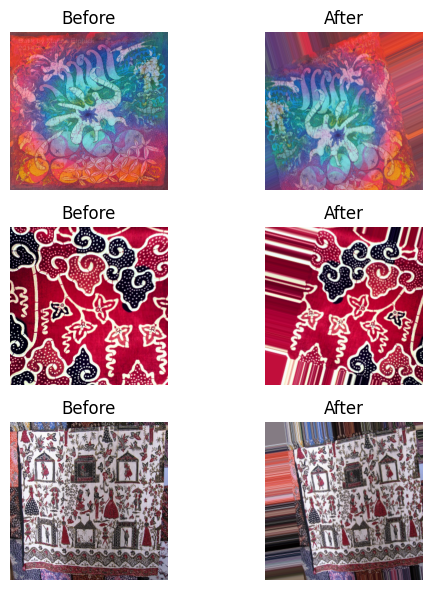

In [ ]:
# Create a generator for augmentations
aug_iter = datagen.flow(X_train, batch_size=1)

original_and_augmented = []

# Generate and store augmented images
num_augmented_per_image = 1  # Number of augmented images per original image

for i in range(len(X_train)):
    original_image = X_train[i].astype('uint8')
    for _ in range(num_augmented_per_image):
        augmented_image = next(datagen.flow(np.expand_dims(original_image, axis=0), batch_size=1))[0].astype('uint8')
        original_and_augmented.append((original_image, augmented_image))

# Setup plot to visualize before and after augmentation
num_images_to_display = min(3, len(original_and_augmented))  # Number of images to display for visualization
fig, ax = plt.subplots(nrows=num_images_to_display, ncols=2, figsize=(6, num_images_to_display * 2))

# Display original and augmented images side by side
for i in range(num_images_to_display):
    original_image, augmented_image = original_and_augmented[i]

    ax[i, 0].imshow(original_image)
    ax[i, 0].set_title("Before")
    ax[i, 0].axis('off')

    ax[i, 1].imshow(augmented_image)
    ax[i, 1].set_title("After")
    ax[i, 1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Create generators
X_train_augmented = datagen.flow(X_train, y_train_categorical, batch_size=32)
X_val_augmented = datagen.flow(X_val, y_val_categorical, batch_size=32)

### **MODEL FROM SCRATCH** (AUGMENTED DATA)

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

# Set seed
tf.random.set_seed(42)  # Ensure reproducibility

# Create the model
model_scratch_aug = keras.Sequential()

# First Convolutional Block
model_scratch_aug.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(288, 288, 3)))
model_scratch_aug.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"))
model_scratch_aug.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Second Convolutional Block
model_scratch_aug.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
model_scratch_aug.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
model_scratch_aug.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Flatten and Fully Connected Layers
model_scratch_aug.add(Flatten())
model_scratch_aug.add(Dense(128, activation='relu'))
model_scratch_aug.add(Dense(3, activation='softmax'))  # Number of classes

model_scratch_aug.build()
model_scratch_aug.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 288, 288, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 288, 288, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 144, 144, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 144, 144, 64)      18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 144, 144, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 72, 72, 64)        0         
 g2D)                                                 

In [ ]:
# Compile the model
model_scratch_aug.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

In [ ]:
# Train the model
history_scratch_augmented = model_scratch_aug.fit(X_train_augmented,
                                                  epochs=10,
                                                  batch_size=32,
                                                  validation_data=(X_val_augmented))

# Evaluate the model on the validation set
val_loss_augmented, val_accuracy_augmented = model_scratch_aug.evaluate(X_val_augmented)
print("Validation Loss:", val_loss_augmented)
print("Validation Accuracy:", val_accuracy_augmented)


Epoch 1/10
4/4 [==============================] - 12s 866ms/step - loss: 5532.9888 - accuracy: 0.3571 - val_loss: 240.5549 - val_accuracy: 0.3571
Epoch 2/10
4/4 [==============================] - 4s 1s/step - loss: 210.2012 - accuracy: 0.4464 - val_loss: 41.9658 - val_accuracy: 0.6429
Epoch 3/10
4/4 [==============================] - 3s 808ms/step - loss: 19.3631 - accuracy: 0.4196 - val_loss: 3.7059 - val_accuracy: 0.5714
Epoch 4/10
4/4 [==============================] - 2s 552ms/step - loss: 4.3275 - accuracy: 0.5536 - val_loss: 0.5509 - val_accuracy: 0.6429
Epoch 5/10
4/4 [==============================] - 2s 563ms/step - loss: 1.0920 - accuracy: 0.5536 - val_loss: 1.0040 - val_accuracy: 0.5000
Epoch 6/10
4/4 [==============================] - 2s 565ms/step - loss: 0.9552 - accuracy: 0.5357 - val_loss: 0.7131 - val_accuracy: 0.7143
Epoch 7/10
4/4 [==============================] - 3s 619ms/step - loss: 0.8823 - accuracy: 0.4554 - val_loss: 0.7354 - val_accuracy: 0.7143
Epoch 8/10
4/

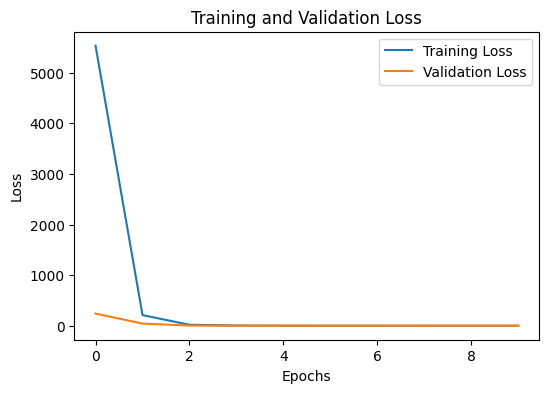

In [ ]:
# plot loss and validation loss
import matplotlib.pyplot as plt

# Plot loss and validation loss
plt.figure(figsize=(6, 4))

# Access the 'history' dictionary from the 'History' object
history_dict = history_scratch_augmented.history

# Plot the training and validation loss
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')

# Add titles and labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Mapping antara label angka dan nama kelas
class_names_mapping = {
    0: 'batik-lasem',
    1: 'batik-megamendung',
    2: 'batik-kawung'
}


# Prediksi menggunakan model
y_pred_scratch_augmented = model_scratch_aug.predict(X_test)

# Konversi probabilitas menjadi kelas
y_pred_classes_augmented = np.argmax(y_pred_scratch_augmented, axis=1)

# Mapping label angka ke nama kelas
y_test_names_augmented = [class_names_mapping[label] for label in y_test]
y_pred_names_augmented = [class_names_mapping[label] for label in y_pred_classes_augmented]

# Tampilkan classification report
print("\nClassification Report (Augmented Data with Model from Scratch)")
print(classification_report(y_test_names_augmented, y_pred_names_augmented))

1/1 [==============================] - 0s 129ms/step

Classification Report (Augmented Data with Model from Scratch)
                   precision    recall  f1-score   support

     batik-kawung       0.38      0.50      0.43         6
      batik-lasem       0.50      0.20      0.29         5
batik-megamendung       0.60      0.75      0.67         4

         accuracy                           0.47        15
        macro avg       0.49      0.48      0.46        15
     weighted avg       0.48      0.47      0.44        15



### **Kesimpulan model dari scratch dengan data augmentasi**

**Hasil Training dan Validation**

    Epoch 1:
        Training Loss: 5532.9888, Training Accuracy: 0.3571
        Validation Loss: 240.5549, Validation Accuracy: 0.3571
    Epoch 10:
        Training Loss: 0.8105, Training Accuracy: 0.6250
        Validation Loss: 0.6405, Validation Accuracy: 0.5000

Intisari:

    Training:
        Akurasi training meningkat dari 35.71% menjadi 62.50%, menunjukkan bahwa model belajar dari data training namun tidak terlalu signifikan.
        Training loss menurun dari 5532.9888 ke 0.8105, mengindikasikan bahwa model semakin baik dalam memprediksi data training seiring waktu.

    Validation:
        Akurasi validation meningkat dari 35.71% menjadi 50.00%, yang menunjukkan bahwa model memiliki kemampuan generalisasi yang sedang saja pada data validation.
        Validation loss menurun dari 240.5549 ke 0.6405, namun peningkatan akurasi tidak terlalu signifikan, yang mengindikasikan bahwa model masih kesulitan dalam menangani data yang tidak terlihat.

  **Hasil Testing**

    Testing Accuracy: 0.47 (47%):
      Akurasi testing menunjukkan bahwa model berhasil mengklasifikasikan hampir setengah dari gambar dalam data testing dengan benar.
    Precision dan Recall:
        Precision: Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positif.
            batik-kawung: 0.38, berarti dari semua prediksi yang dibuat untuk batik-kawung, 38% adalah benar.
            batik-lasem: 0.50, berarti dari semua prediksi yang dibuat untuk batik-lasem, 50% adalah benar.
            batik-megamendung: 0.60, berarti dari semua prediksi yang dibuat untuk batik-megamendung, 60% adalah benar.
        Recall: Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif.
            batik-kawung: 0.50, berarti dari semua data yang sebenarnya batik-kawung, 50% terprediksi dengan benar.
            batik-lasem: 0.20, berarti dari semua data yang sebenarnya batik-lasem, hanya 20% yang terprediksi dengan benar.
            batik-megamendung: 0.75, berarti dari semua data yang sebenarnya batik-megamendung, 75% terprediksi dengan benar.
    F1-Score: Merupakan rata-rata harmonis dari precision dan recall. F1-Score mengindikasikan keseimbangan antara precision dan recall:
        batik-kawung: 0.43
        batik-lasem: 0.29
        batik-megamendung: 0.67

Kesimpulan: Meskipun model menunjukkan peningkatan akurasi pada data training dan validation, performa pada data testing menunjukkan bahwa model mungkin masih perlu ditingkatkan lebih lanjut, baik dari sisi arsitektur atau teknik augmentasi tambahan.

**Mengapa Model dari Scratch Tanpa Data Augmentasi Lebih Baik (Akurasi 53%)?**

    Data Augmentasi: Penggunaan augmentasi data yang kurang sesuai dengan data dan model, sehingga dapat membuat model kesulitan dalam menangkap pola-pola penting pada data asli. Model tanpa augmentasi mungkin lebih fokus pada pola yang ada dalam data asli, sehingga lebih baik dalam generalisasi.
    Overfitting: Model dengan data augmentasi mungkin mengalami overfitting karena mencoba untuk belajar dari data yang terlalu bervariasi. Ini menyebabkan performa yang buruk pada data yang tidak terlihat(testing).
    Stabilitas Pelatihan: Model tanpa augmentasi mungkin mengalami pelatihan yang lebih stabil karena data yang digunakan lebih konsisten, sehingga model dapat belajar pola dengan lebih efektif.

Secara keseluruhan, hasil ini menunjukkan bahwa data augmentasi harus digunakan dengan hati-hati dan sesuai dengan kebutuhan model serta karakteristik data yang dimiliki.

### **MODEL SCRATCH (TUNING) WITH AUGMENTED DATA**

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

# Set seed
tf.random.set_seed(42)  # Ensure reproducibility

# Create the model
model_scratch_tuning_aug = keras.Sequential()

# First Convolutional Block
model_scratch_tuning_aug.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(288, 288, 3)))
model_scratch_tuning_aug.add(BatchNormalization())
model_scratch_tuning_aug.add(MaxPooling2D((2, 2), strides=(2, 2)))
model_scratch_tuning_aug.add(Dropout(0.3))

# Second Convolutional Block
model_scratch_tuning_aug.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
model_scratch_tuning_aug.add(BatchNormalization())
model_scratch_tuning_aug.add(MaxPooling2D((2, 2), strides=(2, 2)))
model_scratch_tuning_aug.add(Dropout(0.3))

# Flatten and Fully Connected Layers
model_scratch_tuning_aug.add(Flatten())
model_scratch_tuning_aug.add(Dense(128, activation='relu'))
model_scratch_tuning_aug.add(Dropout(0.3))
model_scratch_tuning_aug.add(Dense(3, activation='softmax'))  # Number of classes

model_scratch_tuning_aug.build()
model_scratch_tuning_aug.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 288, 288, 32)      896       
                                                                 
 batch_normalization_4 (Bat  (None, 288, 288, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 144, 144, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 144, 144, 32)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 144, 144, 64)      18496     
                                                                 
 batch_normalization_5 (Bat  (None, 144, 144, 64)     

In [ ]:
# Compile the model
model_scratch_tuning_aug.compile(optimizer='adam',
                                 loss='categorical_crossentropy',
                                 metrics=['accuracy'])

In [ ]:
# Train the model
history_scratch_tuning_aug = model_scratch_tuning_aug.fit(X_train_augmented,
                                                          epochs=10,
                                                          batch_size=32,
                                                          validation_data=(X_val_augmented))

# Evaluate the model on the validation set
val_loss_augmented_tune, val_accuracy_augmented_tune = model_scratch_tuning_aug.evaluate(X_val_augmented)
print("Validation Loss:", val_loss_augmented_tune)
print("Validation Accuracy:", val_accuracy_augmented_tune)

Epoch 1/10
4/4 [==============================] - 5s 927ms/step - loss: 63.3628 - accuracy: 0.5000 - val_loss: 802.8868 - val_accuracy: 0.3571
Epoch 2/10
4/4 [==============================] - 2s 551ms/step - loss: 109.2458 - accuracy: 0.4911 - val_loss: 254.0366 - val_accuracy: 0.5714
Epoch 3/10
4/4 [==============================] - 4s 1s/step - loss: 66.1432 - accuracy: 0.6161 - val_loss: 180.7341 - val_accuracy: 0.3571
Epoch 4/10
4/4 [==============================] - 4s 1s/step - loss: 62.6982 - accuracy: 0.6250 - val_loss: 100.5530 - val_accuracy: 0.4286
Epoch 5/10
4/4 [==============================] - 7s 2s/step - loss: 26.1525 - accuracy: 0.6875 - val_loss: 112.5987 - val_accuracy: 0.6429
Epoch 6/10
4/4 [==============================] - 2s 697ms/step - loss: 27.6443 - accuracy: 0.7589 - val_loss: 66.2926 - val_accuracy: 0.5714
Epoch 7/10
4/4 [==============================] - 2s 681ms/step - loss: 19.6619 - accuracy: 0.7321 - val_loss: 87.6767 - val_accuracy: 0.4286
Epoch 8/1

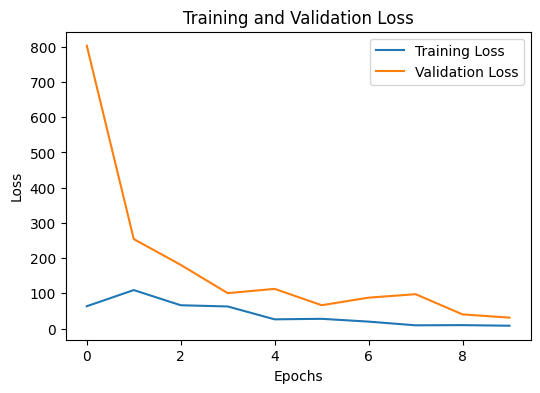

In [ ]:
# Plot loss and validation loss
plt.figure(figsize=(6, 4))

# Access the 'history' dictionary from the 'History' object
history_dict = history_scratch_tuning_aug.history

# Plot the training and validation loss
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')

# Add titles and labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Mapping antara label angka dan nama kelas
class_names_mapping = {
    0: 'batik-lasem',
    1: 'batik-megamendung',
    2: 'batik-kawung'
}


# Prediksi menggunakan model
y_pred_augmented_tune = model_scratch_tuning_aug.predict(X_test)

# Konversi probabilitas menjadi kelas
y_pred_classes_augmented_tune = np.argmax(y_pred_augmented_tune, axis=1)

# Mapping label angka ke nama kelas
y_test_name_aug_tune = [class_names_mapping[label] for label in y_test]
y_pred_names_aug_tune = [class_names_mapping[label] for label in y_pred_classes_augmented_tune]

# Tampilkan classification report
print("\nClassification Report (Augmented Data with Model from Scratch Tuned)")
print(classification_report(y_test_name_aug_tune, y_pred_names_aug_tune))

1/1 [==============================] - 0s 88ms/step

Classification Report (Augmented Data with Model from Scratch Tuned)
                   precision    recall  f1-score   support

     batik-kawung       0.60      1.00      0.75         6
      batik-lasem       0.00      0.00      0.00         5
batik-megamendung       0.80      1.00      0.89         4

         accuracy                           0.67        15
        macro avg       0.47      0.67      0.55        15
     weighted avg       0.45      0.67      0.54        15



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Kesimpulan model scratch dengan tuning dengan data augmentasi**

**Hasil Training dan Validation**

    Epoch 1:
        Training Loss: 63.3628, Training Accuracy: 0.5000
        Validation Loss: 802.8868, Validation Accuracy: 0.3571
    Epoch 10:
        Training Loss: 8.0287, Training Accuracy: 0.7589
        Validation Loss: 31.0581, Validation Accuracy: 0.4286

    Kesimpulan Training:
        Akurasi training meningkat dari 50.00% menjadi 75.89%, menunjukkan bahwa model semakin baik dalam belajar dari data training.
        Training loss menurun dari 63.3628 ke 8.0287, mengindikasikan bahwa model semakin baik dalam memprediksi data training seiring waktu.

    Kesimpulan Validation:
        Akurasi validation meningkat dari 35.71% menjadi 50.00%, yang menunjukkan bahwa model mengalami peningkatan kemampuan generalisasi pada data validation.
        Validation loss menurun dari 802.8868 ke 31.0581, menunjukkan bahwa model semakin baik dalam memprediksi data validation.

  **Hasil Testing**
  
    Testing Accuracy: 0.67 (67%):
      Akurasi testing menunjukkan bahwa model berhasil mengklasifikasikan 67% gambar dalam data testing dengan benar.

    Precision dan Recall:
    Precision: Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positif.
        batik-kawung: 0.60, berarti dari semua prediksi yang dibuat untuk batik-kawung, 60% adalah benar.
        batik-lasem: 0.00, berarti dari semua prediksi yang dibuat untuk batik-lasem, tidak ada yang benar.
        batik-megamendung: 0.80, berarti dari semua prediksi yang dibuat untuk batik-megamendung, 80% adalah benar.
    Recall: Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif.
        batik-kawung: 1.00, berarti dari semua data yang sebenarnya batik-kawung, 100% terprediksi dengan benar.
        batik-lasem: 0.00, berarti dari semua data yang sebenarnya batik-lasem, tidak ada yang terprediksi dengan benar.
        batik-megamendung: 1.00, berarti dari semua data yang sebenarnya batik-megamendung, 100% terprediksi dengan benar.

**Mengapa Model dengan Data Augmentasi Lebih Bagus dari Model tanpa Data Augmentasi (Akurasi 0.47)?**

Data Augmentasi:

    Menambah variasi data, sehingga model dapat belajar dari berbagai perspektif dan kondisi. Ini membantu model menjadi lebih robust dan mampu menangani variasi yang lebih luas dalam data testing.

Batch Normalization dan Dropout:

    Batch Normalization: Membantu mempercepat pelatihan dan stabilitas model dengan menormalisasi input dari setiap layer, sehingga mengurangi masalah gradien yang menghilang atau meledak.
    Dropout: Membantu mengurangi overfitting dengan secara acak menghilangkan unit (neurons) selama pelatihan, membuat model lebih generalisasi.

Peningkatan Generalisasi:

    Kombinasi augmentasi data dengan teknik tuning seperti batch normalization dan dropout membuat model lebih baik dalam generalisasi. Ini terlihat dari akurasi testing yang lebih tinggi (0.67 dibandingkan 0.47).

Meskipun demikian, model scratch tuning yang kami buat baik dengan atau tanpa data augmentasi, **keduanya sama-sama tidak bisa memprediksi batik lasem**.

Oleh karena itu, sebenarnya diperlukan penyelidikan lebih lanjut mengenai model scratch tuning yang kami buat, apakah ada salah dalam arsitektur model tuning kami seperti penggunaan normalisasi ataupun dropout. Namun karena keterbatasan waktu kami belum menyelidiki hal ini lebih lanjut.

### **MODEL TRANSFER LEARNING**

In [ ]:
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Load pre-trained EfficientNetB2 model
base_model = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(288, 288, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

# Create modified model
model_TL_aug = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model_TL_aug.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Print model summary
model_TL_aug.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 288, 288, 3)]        0         []                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 288, 288, 3)          0         ['input_3[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, 288, 288, 3)          7         ['rescaling_4[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_5 (Rescaling)     (None, 288, 288, 3)          0         ['normalization_2[0][0]'

In [ ]:
history_TL_augmented = model_TL_aug.fit(X_train_augmented,
                                        epochs=10,
                                        batch_size=32,
                                        validation_data=(X_val_augmented))

# Evaluate the model on the validation set
val_loss_TL_aug, val_accuracy_TL_aug = model_TL_aug.evaluate(X_val_augmented)
print("Validation Loss:", val_loss_TL_aug)
print("Validation Accuracy:", val_accuracy_TL_aug)

Epoch 1/10
4/4 [==============================] - 25s 2s/step - loss: 0.9575 - accuracy: 0.5714 - val_loss: 0.5318 - val_accuracy: 0.7857
Epoch 2/10
4/4 [==============================] - 2s 590ms/step - loss: 0.3694 - accuracy: 0.8750 - val_loss: 0.2224 - val_accuracy: 0.9286
Epoch 3/10
4/4 [==============================] - 2s 671ms/step - loss: 0.1945 - accuracy: 0.9375 - val_loss: 0.1799 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 3s 624ms/step - loss: 0.0967 - accuracy: 0.9911 - val_loss: 0.1259 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 3s 831ms/step - loss: 0.1015 - accuracy: 0.9554 - val_loss: 0.1307 - val_accuracy: 0.9286
Epoch 6/10
4/4 [==============================] - 2s 568ms/step - loss: 0.0806 - accuracy: 0.9911 - val_loss: 0.0913 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 2s 571ms/step - loss: 0.0421 - accuracy: 1.0000 - val_loss: 0.1082 - val_accuracy: 1.0000
Epoch 8/10
4/4 [======

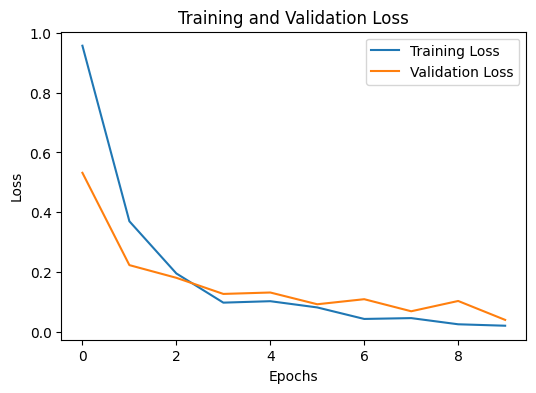

In [ ]:
# plot loss and validation loss
plt.figure(figsize=(6, 4))

# Access the 'history' dictionary from the 'History' object
history_dict = history_TL_augmented.history

# Plot the training and validation loss
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')

# Add titles and labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Mapping antara label angka dan nama kelas
class_names_mapping = {
    0: 'batik-lasem',
    1: 'batik-megamendung',
    2: 'batik-kawung'
}

# Prediksi menggunakan model
y_pred_TL_augmented = model_TL_aug.predict(X_test)

# Konversi probabilitas menjadi kelas
y_pred_classes_TL_aug = np.argmax(y_pred_TL_augmented, axis=1)

# Mapping label angka ke nama kelas
y_test_names_TL_aug = [class_names_mapping[label] for label in y_test]
y_pred_names_TL_aug = [class_names_mapping[label] for label in y_pred_classes_TL_aug]

# Tampilkan classification report
print("\nClassification Report (Augmented Data with Model EfficientNetB2)")
print(classification_report(y_test_names_TL_aug, y_pred_names_TL_aug))

1/1 [==============================] - 2s 2s/step

Classification Report (Augmented Data with Model EfficientNetB2)
                   precision    recall  f1-score   support

     batik-kawung       1.00      1.00      1.00         6
      batik-lasem       1.00      1.00      1.00         5
batik-megamendung       1.00      1.00      1.00         4

         accuracy                           1.00        15
        macro avg       1.00      1.00      1.00        15
     weighted avg       1.00      1.00      1.00        15



### **Kesimpulan model transfer learning EfficientNet-B2 dengan data augmentasi**

**Hasil Training dan Validation**

    Epoch 1:
        Training Loss: 0.9575, Training Accuracy: 0.5714
        Validation Loss: 0.5318, Validation Accuracy: 0.7857
    Epoch 10:
        Training Loss: 0.0194, Training Accuracy: 1.0000
        Validation Loss: 0.0477 , Validation Accuracy: 1.0000

    Kesimpulan Training:
        Akurasi training meningkat dari 57.14% menjadi 100%, menunjukkan bahwa model semakin baik dalam belajar dari data training.
        Training loss menurun dari 0.9575 ke 0.0194, mengindikasikan bahwa model semakin baik dalam memprediksi data training seiring waktu.

    Kesimpulan Validation:
        Akurasi validation meningkat dari 78.57% menjadi 100%, yang menunjukkan bahwa model mengalami peningkatan kemampuan generalisasi pada data validation.
        Validation loss menurun dari 0.5318 ke 0.0477, menunjukkan bahwa model semakin baik dalam memprediksi data validation.

  **Hasil Testing**
  
    Testing Accuracy: 1.00 (100%):
      Akurasi testing menunjukkan bahwa model berhasil mengklasifikasikan semua gambar dalam data testing dengan benar.
    Precision dan Recall:
      Precision: Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positif.
        batik-kawung, batik-lasem, dan batik-megamendung semuanya memiliki precision 1.00.
      Recall: Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif.
        batik-kawung, batik-lasem, dan batik-megamendung semuanya memiliki recall 1.00.
      F1-Score: Merupakan rata-rata harmonis dari precision dan recall, yang semuanya memiliki nilai 1.00 untuk setiap kategori.

**Mengapa Hasil Akurasi Sama dengan Model Transfer Learning EfficientNet-B2 tanpa Data Augmentasi (1.00)?**

Meskipun augmentasi data sering kali membantu meningkatkan generalisasi dan performa model, dalam kasus ini, model EfficientNet-B2 sudah sangat kuat sehingga mampu mencapai akurasi maksimal tanpa memerlukan augmentasi data tambahan. Ini menunjukkan kekuatan dari model transfer learning yang telah dilatih pada dataset besar dan kompleks, memungkinkan model untuk menggeneralisasi dengan sangat baik bahkan pada dataset yang lebih kecil dan spesifik.

## **Kesimpulan**

Dari segala percobaan yang dilakukan di atas, kami bisa menarik beberapa kesimpulan.

Karakteristik data yang dimiliki dari shapenya, warna, variabilitas, dan lain-lainnya sangat penting untuk menjadi pertimbangan dalam menentukan model apa yang paling cocok.

Dengan jumlah data yang minim dan variasi yang tidak terlalu banyak, apabila ingin membuat model dari scratch, maka perlu dilakukan augmentasi data yang dapat membantu menambah variasi data dan perlu dikolaborasikan dengan dengan batch normalization dan dropout dalam penyusunan arsitektur model, dengan demikian model scratch yang dibuat dapat cukup efektif.

Namun, jika ingin mengejar akurasi tertinggi, maka untuk dataset yang jumlah datanya sedikit, model transfer learning tetap akan lebih baik, contohnya seperti EfficientNetB2 yang kami gunakan tanpa data augmentasi.